# Read Data

In [1]:
import pandas as pd
A = pd.read_csv("H:/Projects/digitsnpixels.csv")

In [2]:
A.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
A.shape

(42000, 785)

# Visualize one image by converting into 28*28

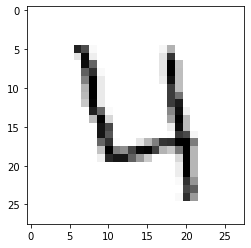

In [4]:
import matplotlib.pyplot as plt
X = A.drop("label",axis=1).values
plt.imshow(X[3:4].reshape(28,28),cmap=plt.cm.binary)

In [5]:
X[3:4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 220, 179,   6,   0,   0,   0,   0,   0,   0,   0,
          0,   9,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  28, 247,  17,   0

# Define X and Y in array format

In [6]:
Y = A.label.values

# Convert Y into categorical data (OHE)

In [7]:
Y_cat = pd.get_dummies(Y).values

In [8]:
Y_cat

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [9]:
import tensorflow as tf
tf.keras.utils.to_categorical(Y)

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

# Scale X

In [11]:
X_Scaled = X/255

In [12]:
X_Scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
Y_cat

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

# Train and Test splits

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_Scaled,Y_cat,test_size=0.2,random_state=21)

In [15]:
xtrain.shape

(33600, 784)

In [16]:
xtest.shape

(8400, 784)

In [17]:
xtrain = xtrain.reshape(33600,28,28,1)
xtest = xtest.reshape(8400,28,28,1)

In [18]:
xtrain.shape

(33600, 28, 28, 1)

# Create NN

In [19]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,BatchNormalization,Flatten

In [20]:
nn = Sequential()
nn.add(Convolution2D(filters = 16,kernel_size = (3,3),activation = "relu",input_shape=(28,28,1)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))
nn.add(Flatten())
nn.add(Dense(120,activation="relu"))
nn.add(Dense(10,activation="softmax"))

In [21]:
nn.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [22]:
nn.fit(xtrain,ytrain,epochs=10,batch_size=64)

Epoch 1/10
525/525 [==============================] - 28s 33ms/step - loss: 0.2186 - accuracy: 0.9330
Epoch 2/10
525/525 [==============================] - 16s 31ms/step - loss: 0.0748 - accuracy: 0.9773
Epoch 3/10
525/525 [==============================] - 17s 32ms/step - loss: 0.0426 - accuracy: 0.9867
Epoch 4/10
525/525 [==============================] - 17s 33ms/step - loss: 0.0281 - accuracy: 0.9904
Epoch 5/10
525/525 [==============================] - 16s 30ms/step - loss: 0.0202 - accuracy: 0.9931
Epoch 6/10
525/525 [==============================] - 16s 30ms/step - loss: 0.0220 - accuracy: 0.9928
Epoch 7/10
525/525 [==============================] - 15s 29ms/step - loss: 0.0167 - accuracy: 0.9944
Epoch 8/10
525/525 [==============================] - 17s 33ms/step - loss: 0.0163 - accuracy: 0.9940
Epoch 9/10
525/525 [==============================] - 16s 30ms/step - loss: 0.0154 - accuracy: 0.9948
Epoch 10/10
525/525 [==============================] - 16s 30ms/step - loss: 0.011

In [23]:
pred_prob = nn.predict(xtest)

In [24]:
pred_prob

array([[1.5260559e-09, 9.9999988e-01, 3.0126499e-10, ..., 1.4258757e-07,
        3.5881790e-08, 1.0825616e-08],
       [1.5658735e-16, 5.0755770e-13, 8.3042766e-17, ..., 1.0164136e-09,
        8.4924275e-16, 1.1093637e-11],
       [1.9167663e-14, 2.9196806e-12, 9.9995470e-01, ..., 4.4531576e-10,
        4.3846936e-05, 7.6602262e-08],
       ...,
       [1.0000000e+00, 1.2927684e-12, 9.9013145e-11, ..., 2.6254265e-13,
        4.2107040e-11, 2.7003183e-12],
       [1.3585061e-13, 9.9999964e-01, 1.4234391e-07, ..., 4.7967230e-09,
        2.0770969e-09, 1.0834057e-09],
       [4.6621442e-13, 7.6695113e-14, 1.0000000e+00, ..., 2.0618790e-11,
        1.2286695e-09, 2.1327422e-14]], dtype=float32)

In [25]:
from numpy import argmax
pred = argmax(pred_prob,axis=1)

In [26]:
pred

array([1, 4, 2, ..., 0, 1, 2], dtype=int64)

In [27]:
ytest = argmax(ytest,axis=1)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.9847619047619047